<a href="https://colab.research.google.com/github/NishaKathiriya/6D-ML-2022-Winter/blob/main/car_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.

In [ ]:
!sudo apt-get install -qq w3m # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libgpm2:amd64.
(Reading database ... 155681 files and directories currently installed.)
Preparing to unpack .../libgpm2_1.20.7-5_amd64.deb ...
Unpacking libgpm2:amd64 (1.20.7-5) ...
Selecting previously unselected package w3m.
Preparing to unpack .../w3m_0.5.3-36build1_amd64.deb ...
Unpacking w3m (0.5.3-36build1) ...
Setting up libgpm2:amd64 (1.20.7-5) ...
Setting up w3m (0.5.3-36build1) ...
Processing triggers for mime-support (3.60ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.5) ...
Proces

In [ ]:
pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install gradio
import gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.1 MB 29.6 MB/s 
     |████████████████████████████████| 212 kB 73.0 MB/s 
     |████████████████████████████████| 84 kB 3.8 MB/s 
     |████████████████████████████████| 57 kB 3.4 MB/s 
     |████████████████████████████████| 84 kB 3.8 MB/s 
     |████████████████████████████████| 54 kB 1.8 MB/s 
     |████████████████████████████████| 2.3 MB 61.0 MB/s 
     |████████████████████████████████| 54 kB 3.8 MB/s 
     |████████████████████████████████| 270 kB 72.7 MB/s 
     |████████████████████████████████| 112 kB 69.6 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 80 kB 7.4 MB/s 
     |████████████████████████████████| 68 kB 7.1 MB/s 
     |████████████████████████████████| 43 kB 1.1 MB/s 
     |████████████████████████████████| 4.1 MB 50.6 MB/s 
     |████████████████████████████████| 856 kB 50

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,CSVLogger
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense, GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.preprocessing import image
from matplotlib.pyplot import rcParams
import cv2
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers, optimizers
import gradio as gr
import tensorflow as tf 
import numpy as np
import requests
from tensorflow.keras.models import load_model

In [ ]:
data_folder = r"/content/drive/MyDrive/train"

In [ ]:
train = tf.keras.preprocessing.image_dataset_from_directory(data_folder,validation_split=0.2,subset="training",
                                                            seed=100,image_size=(224, 224),batch_size=32)

Found 217 files belonging to 7 classes.
Using 174 files for training.


In [ ]:
valid = tf.keras.preprocessing.image_dataset_from_directory(data_folder,validation_split=0.2,subset="validation",
                                                            seed=100,image_size=(224, 224),batch_size=32)

Found 217 files belonging to 7 classes.
Using 43 files for validation.


In [ ]:
class_names = train.class_names
print(class_names)

['abarth', 'acura', 'alfa romeo', 'aston martin', 'audi', 'bentley', 'bmw']


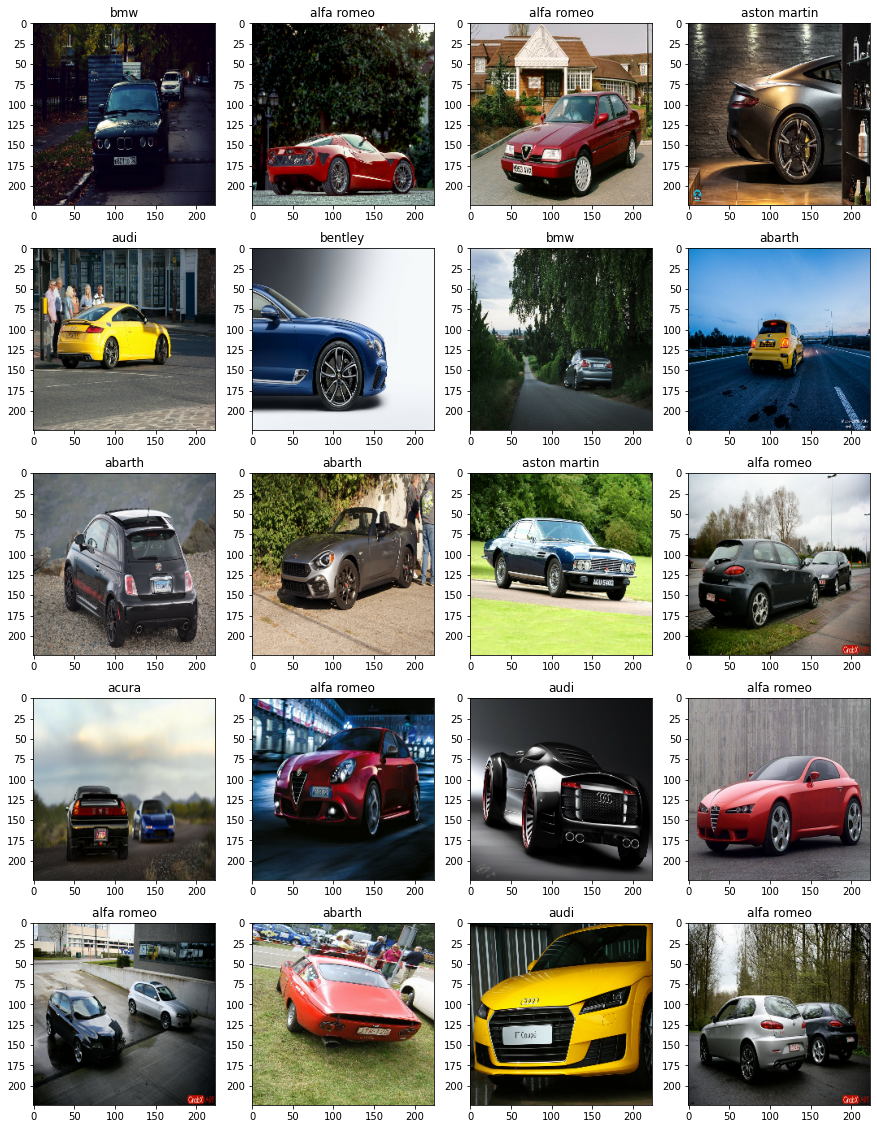

In [ ]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(20):
        plt.subplot(5, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])

In [ ]:
model = Sequential()

# Convolution + Maxpool2D Layer 
model.add(Conv2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())

# Output layer
model.add(Dense(7,activation = 'softmax'))

# Complile the model
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=["accuracy"])

# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 20736)             0         
                                                                 
 dense (Dense)               (None, 7)                 1

In [ ]:

hist = model.fit(train,validation_data=valid,epochs=30,verbose=2,batch_size=8)

Epoch 1/30
6/6 - 105s - loss: 422.6016 - accuracy: 0.1609 - val_loss: 217.4905 - val_accuracy: 0.1163 - 105s/epoch - 17s/step
Epoch 2/30
6/6 - 1s - loss: 131.1213 - accuracy: 0.2414 - val_loss: 15.5405 - val_accuracy: 0.1628 - 1s/epoch - 180ms/step
Epoch 3/30
6/6 - 1s - loss: 5.7850 - accuracy: 0.3103 - val_loss: 3.5273 - val_accuracy: 0.1628 - 1s/epoch - 179ms/step
Epoch 4/30
6/6 - 1s - loss: 0.8327 - accuracy: 0.7241 - val_loss: 2.9240 - val_accuracy: 0.2558 - 1s/epoch - 178ms/step
Epoch 5/30
6/6 - 1s - loss: 0.4021 - accuracy: 0.9080 - val_loss: 3.2121 - val_accuracy: 0.2093 - 1s/epoch - 180ms/step
Epoch 6/30
6/6 - 1s - loss: 0.1501 - accuracy: 0.9713 - val_loss: 4.6616 - val_accuracy: 0.2791 - 1s/epoch - 195ms/step
Epoch 7/30
6/6 - 1s - loss: 0.1037 - accuracy: 0.9828 - val_loss: 4.6846 - val_accuracy: 0.2326 - 1s/epoch - 175ms/step
Epoch 8/30
6/6 - 1s - loss: 0.0743 - accuracy: 0.9885 - val_loss: 4.8818 - val_accuracy: 0.1860 - 1s/epoch - 176ms/step
Epoch 9/30
6/6 - 1s - loss: 0.0

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  validation_split=0.2, 
                                  horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [ ]:
image_shape=(224,224,3)
train_data=train_datagen.flow_from_directory(data_folder,subset="training",
                                         target_size=image_shape[:2],
                                         class_mode = 'categorical',
                                         batch_size=5,shuffle=True)

Found 177 images belonging to 7 classes.


In [ ]:
val_data=test_datagen.flow_from_directory(data_folder,
                                       subset="validation",
                                       target_size=image_shape[:2],
                                       class_mode = 'categorical',
                                       batch_size=5,shuffle=True)

Found 40 images belonging to 7 classes.


In [ ]:
model1 = Sequential()

model1.add(Conv2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
model1.add(MaxPooling2D(3,3))
model1.add(Conv2D(16,(3,3),activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Flatten())

model1.add(Dense(7,activation = 'softmax'))

model1.compile(optimizer="adam",loss='categorical_crossentropy',metrics=["accuracy"])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 20736)             0         
                                                                 
 dense_1 (Dense)             (None, 7)                

In [ ]:
hist_1 = model1.fit(train_data,validation_data=val_data,epochs=30,verbose=2,batch_size=5,steps_per_epoch=len(train_data),validation_steps=len(val_data))

Epoch 1/30
36/36 - 4s - loss: 2.0336 - accuracy: 0.2260 - val_loss: 1.8350 - val_accuracy: 0.2750 - 4s/epoch - 118ms/step
Epoch 2/30
36/36 - 4s - loss: 1.8438 - accuracy: 0.2712 - val_loss: 1.7940 - val_accuracy: 0.3250 - 4s/epoch - 99ms/step
Epoch 3/30
36/36 - 4s - loss: 1.7856 - accuracy: 0.3107 - val_loss: 1.8347 - val_accuracy: 0.3000 - 4s/epoch - 102ms/step
Epoch 4/30
36/36 - 4s - loss: 1.6543 - accuracy: 0.3616 - val_loss: 1.9037 - val_accuracy: 0.3500 - 4s/epoch - 100ms/step
Epoch 5/30
36/36 - 4s - loss: 1.5606 - accuracy: 0.4407 - val_loss: 1.9203 - val_accuracy: 0.2000 - 4s/epoch - 100ms/step
Epoch 6/30
36/36 - 4s - loss: 1.3793 - accuracy: 0.4915 - val_loss: 2.0437 - val_accuracy: 0.2000 - 4s/epoch - 99ms/step
Epoch 7/30
36/36 - 4s - loss: 1.2390 - accuracy: 0.5537 - val_loss: 2.0043 - val_accuracy: 0.3250 - 4s/epoch - 99ms/step
Epoch 8/30
36/36 - 4s - loss: 1.1551 - accuracy: 0.5989 - val_loss: 2.1036 - val_accuracy: 0.3000 - 4s/epoch - 98ms/step
Epoch 9/30
36/36 - 4s - loss

In [ ]:
model2 = Sequential(name='Batch_Normalization')
model2.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=image_shape))
model2.add(MaxPool2D(pool_size=2, strides=2))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model2.add(MaxPool2D(pool_size=2, strides=2))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model2.add(MaxPool2D(pool_size=2, strides=2))
model2.add(BatchNormalization())

model2.add(Flatten())

model2.add(Dense(units=512, activation='relu'))
model2.add(Dense(units=256, activation='relu'))
model2.add(Dense(units=128, activation='relu'))
model2.add(Dense(units=7, activation='sigmoid'))
print(model2.summary())

Model: "Batch_Normalization"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                               

In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist_2 = model2.fit_generator(train_data,
                             epochs=30,
                             verbose=2,
                             steps_per_epoch=len(train_data),
                             validation_data=val_data,
                             validation_steps=len(val_data))

Epoch 1/30
36/36 - 5s - loss: 3.9893 - accuracy: 0.2203 - val_loss: 3.0548 - val_accuracy: 0.2750 - 5s/epoch - 130ms/step
Epoch 2/30
36/36 - 4s - loss: 2.8767 - accuracy: 0.3503 - val_loss: 2.2806 - val_accuracy: 0.2750 - 4s/epoch - 100ms/step
Epoch 3/30
36/36 - 4s - loss: 1.9283 - accuracy: 0.4463 - val_loss: 2.8489 - val_accuracy: 0.2750 - 4s/epoch - 102ms/step
Epoch 4/30
36/36 - 4s - loss: 1.8605 - accuracy: 0.4859 - val_loss: 3.1370 - val_accuracy: 0.2250 - 4s/epoch - 101ms/step
Epoch 5/30
36/36 - 4s - loss: 1.3562 - accuracy: 0.5311 - val_loss: 3.4713 - val_accuracy: 0.2000 - 4s/epoch - 101ms/step
Epoch 6/30
36/36 - 4s - loss: 1.1131 - accuracy: 0.6271 - val_loss: 3.7969 - val_accuracy: 0.2000 - 4s/epoch - 102ms/step
Epoch 7/30
36/36 - 4s - loss: 0.9978 - accuracy: 0.7119 - val_loss: 5.3277 - val_accuracy: 0.2750 - 4s/epoch - 102ms/step
Epoch 8/30
36/36 - 4s - loss: 1.1208 - accuracy: 0.6893 - val_loss: 3.7654 - val_accuracy: 0.2750 - 4s/epoch - 100ms/step
Epoch 9/30
36/36 - 4s - 

In [ ]:
model3 = Sequential(name='Dropout')
model3.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=image_shape))
model3.add(MaxPool2D(pool_size=2, strides=2))
model3.add(Dropout(0.3))

model3.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model3.add(MaxPool2D(pool_size=2, strides=2))
model3.add(Dropout(0.3))

model3.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model3.add(MaxPool2D(pool_size=2, strides=2))
model3.add(Dropout(0.3))

model3.add(Flatten())

model3.add(Dense(units=512, activation='relu'))
model3.add(Dense(units=256, activation='relu'))
model3.add(Dense(units=128, activation='relu'))
model3.add(Dense(units=7, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 20736)             0         
                                                                 
 dense (Dense)               (None, 7)                 1

In [ ]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


hist_3 = model3.fit_generator(train_data,
                             epochs=30,
                             verbose=2,
                             steps_per_epoch=len(train_data),
                             validation_data=val_data,
                             validation_steps=len(val_data))

Epoch 1/30
36/36 - 5s - loss: 2.0901 - accuracy: 0.1638 - val_loss: 1.8732 - val_accuracy: 0.2000 - 5s/epoch - 128ms/step
Epoch 2/30
36/36 - 4s - loss: 1.8636 - accuracy: 0.2034 - val_loss: 1.8806 - val_accuracy: 0.2750 - 4s/epoch - 103ms/step
Epoch 3/30
36/36 - 4s - loss: 1.8427 - accuracy: 0.2260 - val_loss: 1.7783 - val_accuracy: 0.2750 - 4s/epoch - 101ms/step
Epoch 4/30
36/36 - 4s - loss: 1.8405 - accuracy: 0.2034 - val_loss: 1.7724 - val_accuracy: 0.2750 - 4s/epoch - 99ms/step
Epoch 5/30
36/36 - 4s - loss: 1.8149 - accuracy: 0.2655 - val_loss: 1.8421 - val_accuracy: 0.2750 - 4s/epoch - 102ms/step
Epoch 6/30
36/36 - 4s - loss: 1.8232 - accuracy: 0.2486 - val_loss: 1.7986 - val_accuracy: 0.1250 - 4s/epoch - 102ms/step
Epoch 7/30
36/36 - 4s - loss: 1.8058 - accuracy: 0.1921 - val_loss: 1.8597 - val_accuracy: 0.1250 - 4s/epoch - 101ms/step
Epoch 8/30
36/36 - 4s - loss: 1.8183 - accuracy: 0.2768 - val_loss: 1.8083 - val_accuracy: 0.2500 - 4s/epoch - 101ms/step
Epoch 9/30
36/36 - 4s - l

In [ ]:
base_model=tf.keras.applications.MobileNet(input_shape=image_shape,include_top=False)

base_model.trainable=False

for layer in base_model.layers[71:]:
    layer.trainable=True

model_final=Sequential([base_model,
                          GlobalAveragePooling2D(),
                          Dense(512,activation='relu'),
                          Dense(7,activation='softmax')])

model_final.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',patience=10)
check_point=ModelCheckpoint('/content/drive/MyDrive/train/Model_weights/model.{epoch:02d}-{val_loss:.2f}.h5',)
csv_logger = CSVLogger('/content/drive/MyDrive/train/training.log')

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
model_final.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 dense_11 (Dense)            (None, 7)                 3591      
                                                                 
Total params: 3,757,255
Trainable params: 528,391
Non-trainable params: 3,228,864
_________________________________________________________________


In [ ]:
model_final.fit_generator(train_data,epochs=30,steps_per_epoch=len(train_data),validation_data=val_data,
                              validation_steps=len(val_data),verbose=2,
                              callbacks=[early_stop,check_point,csv_logger])

Epoch 1/30
36/36 - 12s - loss: 2.5124 - accuracy: 0.2203 - val_loss: 1.7523 - val_accuracy: 0.1750 - 12s/epoch - 328ms/step
Epoch 2/30
36/36 - 6s - loss: 1.5218 - accuracy: 0.4520 - val_loss: 1.7843 - val_accuracy: 0.3000 - 6s/epoch - 175ms/step
Epoch 3/30
36/36 - 6s - loss: 1.2772 - accuracy: 0.5650 - val_loss: 1.9210 - val_accuracy: 0.3000 - 6s/epoch - 175ms/step
Epoch 4/30
36/36 - 7s - loss: 1.2361 - accuracy: 0.5989 - val_loss: 1.8606 - val_accuracy: 0.4000 - 7s/epoch - 186ms/step
Epoch 5/30
36/36 - 6s - loss: 0.9087 - accuracy: 0.7062 - val_loss: 1.9823 - val_accuracy: 0.3000 - 6s/epoch - 170ms/step
Epoch 6/30
36/36 - 6s - loss: 1.1676 - accuracy: 0.5876 - val_loss: 2.2754 - val_accuracy: 0.1500 - 6s/epoch - 170ms/step
Epoch 7/30
36/36 - 6s - loss: 1.0031 - accuracy: 0.6328 - val_loss: 2.1289 - val_accuracy: 0.3000 - 6s/epoch - 169ms/step
Epoch 8/30
36/36 - 6s - loss: 0.9077 - accuracy: 0.6780 - val_loss: 2.2261 - val_accuracy: 0.2500 - 6s/epoch - 170ms/step
Epoch 9/30
36/36 - 6s 

In [ ]:
log=pd.read_csv('/content/drive/MyDrive/train/training.log',index_col=0)
log.sort_values(by='val_accuracy',ascending=False).head(10)

,accuracy,loss,val_accuracy,val_loss
epoch,,,,
3,0.598870,1.236082,0.400,1.860561
8,0.683616,0.801333,0.400,2.451413
9,0.683616,0.827905,0.400,2.180534
1,0.451977,1.521816,0.300,1.784298
2,0.564972,1.277241,0.300,1.921011
4,0.706215,0.908695,0.300,1.982296
6,0.632768,1.003103,0.300,2.128867
7,0.677966,0.907653,0.250,2.226064
10,0.813559,0.582824,0.200,2.169803


In [ ]:
mod=load_model('/content/drive/MyDrive/train/Model_weights/model.01-1.75.h5')

In [ ]:
model_load=mod=load_model(r"/content/drive/MyDrive/train/Model_weights/model.01-1.75.h5")
class_names=['abarth', 'acura', 'alfa romeo', 'aston martin', 'audi', 'bentley', 'bmw']
def prediction(image):
    image = image.reshape((1, 224, 224, 3))
    image=tf.keras.applications.mobilenet.preprocess_input(image)
    prediction = model_load.predict(image).flatten()
    return {class_names[i]: float(prediction[i]) for i in range(7)}

In [ ]:
image1 = gr.inputs.Image(shape=(224,224))
label1 = gr.outputs.Label(num_top_classes=7)

# Gradio interface to input an image and see its prediction with percentage confidence
gr.Interface(fn=prediction, inputs=image1, outputs=label1,
             #theme="huggingface",
             title="CLASSIFICATION OF CAR MODELS USING CONVOLUTIONAL NEURAL NETWORK",
             description =" Select an image and hit submit to see its classification",
             allow_flagging=False,
             layout="vertical",
             live=True,
             capture_session=True,
             interpretation='default').launch(auth=('user','password'),debug='True',share=True)

Hint: Set streaming=True for Image component to use live streaming.
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://22773.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces
